In [1]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.circuit.library import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

## Flipping a qubit.

Input: A qubit in the state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$.

Goal: A qubit in the state $|\psi'\rangle = |\alpha |1\rangle + \beta |0\rangle$.

Solution: The X-gate flips a qubit from $|0\rangle$ to $|1\rangle$ and vice-versa.

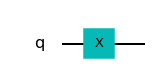

In [2]:
circ = QuantumCircuit(1)
circ.x(0)
circ.draw("mpl")

To see if this gate actually flips a qubit, we prepare a state $|\psi\rangle$ and then apply this gate to it.

In [3]:
rng = np.random.default_rng()

alpha, beta = rng.random((2,))
norm = np.sqrt(alpha**2 + beta**2)
alpha, beta = alpha / norm, beta / norm

psi = Statevector([alpha, beta])
psip = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psip>: {psip.data}")

|psi>: [0.1755286 +0.j 0.98447433+0.j]
|psip>: [0.98447433+0.j 0.1755286 +0.j]


## Basis change.

Input: A qubit in the state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$.

Goal: If a qubit is in the state $|0\rangle$, change its state to $|+\rangle$. If it is in state $|1\rangle$, change its state to $|-\rangle$. If it is in a superposition state, change its state according to the effects on the basis vectors.

Solution: The Hadamard or H-gate does the job, $H|0\rangle = |+\rangle$, $H|1\rangle$. 

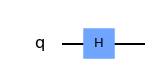

In [4]:
circ = QuantumCircuit(1)
circ.h(0)
circ.draw("mpl")

In [5]:
zero = Statevector([1, 0])
one = Statevector([0, 1])

plus = zero.evolve(circ)
minus = one.evolve(circ)
psih = psi.evolve(circ)

print(f"|+>: {plus.data}")
print(f"|->: {minus.data}")
print(f"|psih>: {psih.data}")

|+>: [0.70710678+0.j 0.70710678+0.j]
|->: [ 0.70710678+0.j -0.70710678+0.j]
|psih>: [ 0.82024594+0.j -0.57201102+0.j]


## Sign flip

Input: A qubit in the state $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$.

Output: A qubit in the state $|\psi'\rangle = \alpha |0\rangle - \beta |1\rangle$.

Solution: The Z-gate flips the sign of $|1\rangle$. It converts $|+\rangle$ to $|-\rangle$. The Z-gate acts in the same way in the X basis as the X-gate in the Z basis.

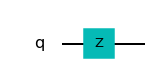

In [6]:
circ = QuantumCircuit(1)
circ.z(0)
circ.draw("mpl")

In [7]:
psi_sf = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_sf>: {psi_sf.data}")

|psi>: [0.1755286 +0.j 0.98447433+0.j]
|psi_sf>: [ 0.1755286 +0.j -0.98447433+0.j]


## Amplitude change

Input: A qubit in state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, and an angle $\theta$ in radians.

Goal: If a qubit is in the state $|0\rangle$, change its state to $\cos\theta|0\rangle + \sin\theta|1\rangle$. If it is in state $|1\rangle$, change its state to $-\sin\theta|0\rangle + \cos\theta|1\rangle$. If it is in a superposition state, change its state according to the effects on the basis vectors. 

Solution: We have to use the $U_3(2\theta, 0, 0)$-gate. The matrix representation of this gate is $$\begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}.$$

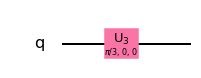

In [8]:
def amplitude_change(theta):
    circ = QuantumCircuit(1)
    circ.u3(2 * theta, 0, 0, 0)
    return circ

theta = np.pi / 6
circ = amplitude_change(theta)
circ.draw("mpl")

In [9]:
psi_ac = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_ac>: {psi_ac.data}")

|psi>: [0.1755286 +0.j 0.98447433+0.j]
|psi_ac>: [-0.34022494+0.j  0.94034408+0.j]


## Phase flip

Input: A qubit in state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$.

Goal: Change the qubit state to $|\psi'\rangle = \alpha|0\rangle + i\beta|1\rangle$.

Solution: We can use the $U_1(\phi)$-gate for this, with $\phi = \pi/2$, whose matrix representation is $$\begin{bmatrix} = 1 & 0 \\ 0 & i \end{bmatrix}$$.

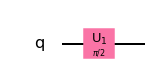

In [10]:
phi = np.pi / 2
circ = QuantumCircuit(1)
circ.u1(phi, 0)
circ.draw("mpl")

In [11]:
psi_pf = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_pf>: {psi_pf.data}")

|psi>: [0.1755286 +0.j 0.98447433+0.j]
|psi_pf>: [0.1755286+0.j         0.       +0.98447433j]


## Phase change

Input: A qubit in state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, and an angle $\theta$ in radians. 

Goal: If a qubit is in the state $|0\rangle$, don't change its state. If it is in state $|1\rangle$, change its state to $e^{i\theta}|1\rangle$. If it is in a superposition state, change its state according to the effects on the basis vectors. 

Solution: This is a generalization of the previous problem. The required gate is $U_1(\theta)$, whose matrix representation is $$\begin{bmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}.$$

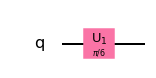

In [12]:
def phase_change(theta):
    circ = QuantumCircuit(1)
    circ.u1(theta, 0)
    return circ

theta = np.pi / 6
circ = phase_change(theta)
circ.draw("mpl")

In [13]:
psi_pc = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_pc>: {psi_pc.data}")

|psi>: [0.1755286 +0.j 0.98447433+0.j]
|psi_pc>: [0.1755286 +0.j         0.85257978+0.49223717j]


## Global phase change

Input: A qubit in state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$.

Goal: Change state of qubit to $-\alpha|0\rangle - \beta|1\rangle$.

Solution: We can do this with the $R_\phi(2\pi)$-gate, which rotates the qubit by $\pi$ radians around the $z$-axis. Its matrix representation is $$\begin{bmatrix} e^{-i\pi} & 0 \\ 0 & e^{i\pi} \end{bmatrix}.$$ A global phase change cannot be measured.

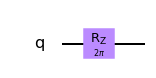

In [14]:
circ = QuantumCircuit(1)
circ.rz(2 * np.pi, 0)
circ.draw("mpl")

In [15]:
psi_gpc = psi.evolve(circ)
print(f"|psi>: {psi.data}")
print(f"|psi_gpc>: {psi_gpc.data}")

|psi>: [0.1755286 +0.j 0.98447433+0.j]
|psi_gpc>: [-0.1755286 -0.j -0.98447433+0.j]


## Bell state change - 1

Input: Two entangled qubits in the Bell state $|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$.

Goal: Change the two qubit state to $|\phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$.

Solution: We can do this with a Z-gate acting on either of the qubits. 

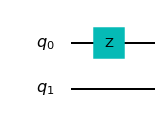

In [16]:
circ = QuantumCircuit(2)
circ.z(0)
circ.draw("mpl")

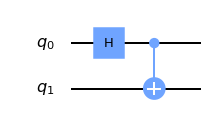

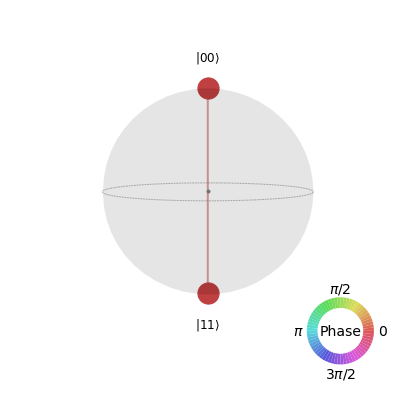

In [17]:
# Produce bell state |\phi^+>
bell_plus = QuantumCircuit(2)
bell_plus.h(0)
bell_plus.cx(0, 1)
display(bell_plus.draw("mpl"))

phi_plus = Statevector.from_instruction(bell_plus)
plot_state_qsphere(phi_plus)

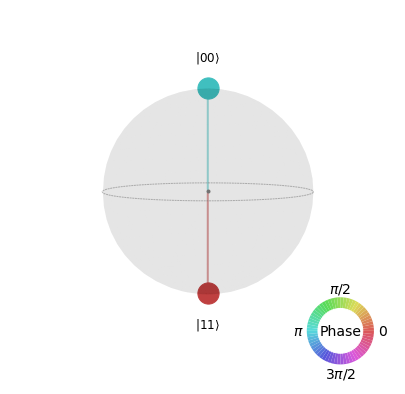

In [18]:
# change bell state |\phi^+> to |\phi^->
phi_minus = phi_plus.evolve(circ)
plot_state_qsphere(phi_minus)

## Bell state change - 2

Input: Two entangled qubits in the Bell state $|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$.

Goal: Change the two qubit state to $|\psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$.

Solution: This will be possible with an X-gate applied to the least significant bit (or the zeroth bit).

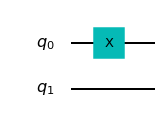

In [19]:
circ = QuantumCircuit(2)
circ.x(0)
circ.draw("mpl")

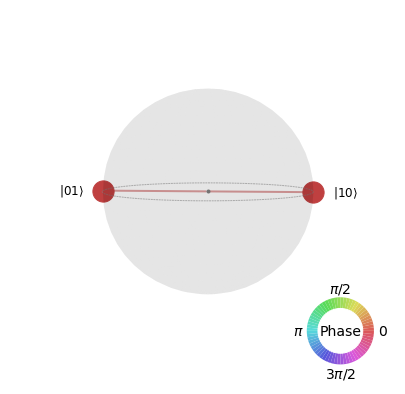

In [20]:
psi_plus = phi_plus.evolve(circ)
plot_state_qsphere(phi_plus)
plot_state_qsphere(psi_plus)

## Bell state change - 3

Input: Two entangled qubits in the Bell state $|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$.

Goal: Change the two qubit state to $|\psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$.

Solution: This will be possible with an X-gate applied to the least significant bit, followed by a Z-gate on the most significant bit.

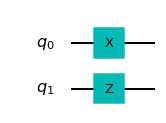

In [21]:
circ = QuantumCircuit(2)
circ.x(0)
circ.z(1)
circ.draw("mpl")

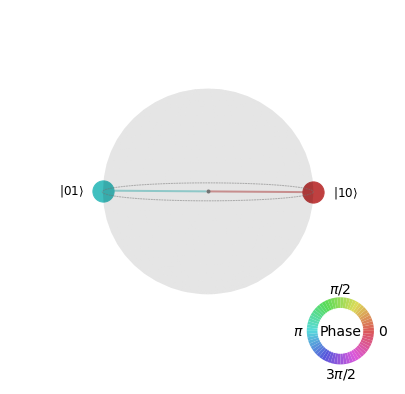

In [22]:
psi_minus = phi_plus.evolve(circ)
plot_state_qsphere(phi_plus)
plot_state_qsphere(psi_minus)

## Two qubit gate - 1

Input: Two unentangled qubits, the first in state $\alpha|0\rangle  + \beta|1\rangle$, and the second in state $|0\rangle$.

Goal: Change the two qubit state to $\alpha|00\rangle + \beta|11\rangle$.

Solution: This can be done with a controlled-NOT or CNOT-gate, with the first qubit as the control and the second qubit as the target.

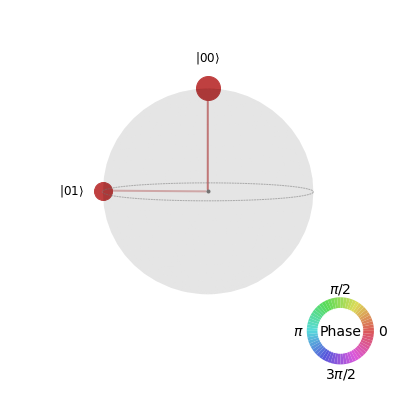

In [23]:
# Create initial state
def psi_zero(alpha, beta):
    circ = QuantumCircuit(2)
    circ.u3(2 * np.arccos(alpha), 0, 0, 0)
    sv = Statevector.from_instruction(circ)
    return sv

alpha, beta = 4/5, 3/5 
initial_state = psi_zero(alpha, beta)
plot_state_qsphere(initial_state)

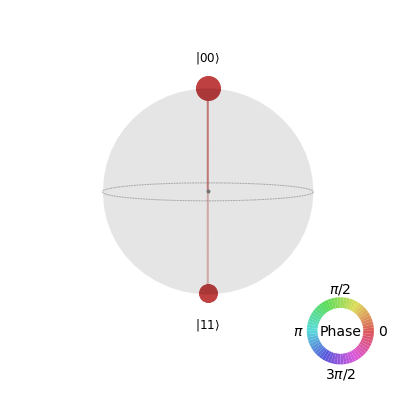

In [24]:
# Change it to \alpha|00> + \beta|11\rangle
circ = QuantumCircuit(2)
circ.cx(0, 1)

final_state = initial_state.evolve(circ)
plot_state_qsphere(final_state)

## Two qubit gate - 2

Input: Two unentangled qubits in the state $|+\rangle \otimes |+\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$.

Goal: Change the two-qubit state to $\frac{1}{2}(|00\rangle + |01\rangle + |10\rangle - |11\rangle)$.

Solution: Controlled Z-gate with the first qubit as the control and the second as the target, will give the final state. This can be used as an oracle to mark the $|11\rangle$ state.

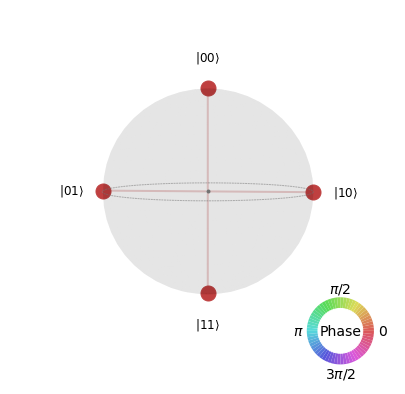

In [25]:
# Create initial state
max_sup = QuantumCircuit(2)
max_sup.h([0, 1])

initial_state = Statevector.from_instruction(max_sup)
plot_state_qsphere(initial_state)

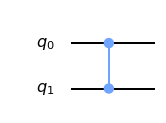

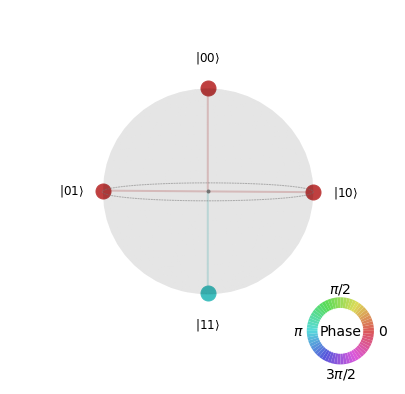

In [26]:
circ = QuantumCircuit(2)
circ.cz(0, 1)
display(circ.draw("mpl"))

final_state = initial_state.evolve(circ)
plot_state_qsphere(final_state)

## Two qubit gate - 3

Input: Two unentangled qubits in the state $\alpha|00\rangle + \beta|01\rangle + \gamma|10\rangle + \delta|11\rangle)$.

Goal: Change the two-qubit state to $\alpha|00\rangle + \gamma|01\rangle + \beta|10\rangle + \delta|11\rangle)$.

Solution: One solution is to use three CNOT gates. The first one with the first qubit as control will interchange $|01\rangle$ and $|11\rangle$. The second one with the second qubit as control will interchange $|10\rangle$ and $|11\rangle$. The third one with the first qubit as control will interchange $|01\rangle$ and $|11\rangle$.

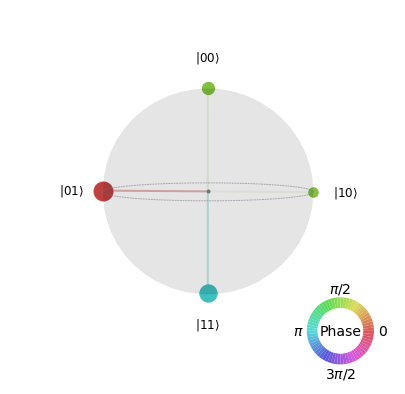

array([ 0.40824829+0.j        , -0.        -0.63245553j,
        0.31622777+0.j        ,  0.        +0.57735027j])

In [32]:
alpha = 1 / np.sqrt(6)
beta = (-2j)/np.sqrt(10)
gamma = 1 / np.sqrt(10)
delta = (1j) / np.sqrt(3)
initial_state = Statevector([alpha, beta, gamma, delta])

display(plot_state_qsphere(initial_state))
initial_state.data

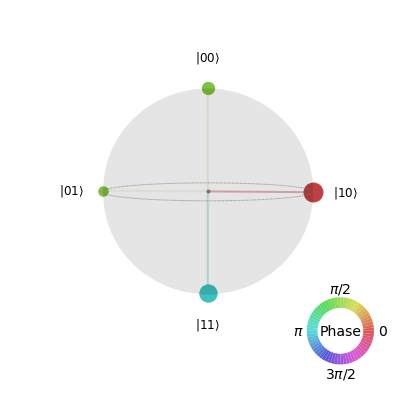

array([0.40824829+0.j        , 0.31622777+0.j        ,
       0.        -0.63245553j, 0.        +0.57735027j])

In [33]:
circ = QuantumCircuit(2)
circ.cx(0, 1)
circ.cx(1, 0)
circ.cx(0, 1)

final_state = initial_state.evolve(circ)
display(plot_state_qsphere(final_state))
final_state.data

## Toffoli Gate

Input: An arbitrary three qubit state $\alpha|000\rangle + \gamma|001\rangle + \beta|010\rangle + \delta|011\rangle + \epsilon|100\rangle + \zeta|101\rangle + \eta|110\rangle + \theta|111\rangle)$.

Goal: The three qubit state $\alpha|000\rangle + \gamma|001\rangle + \beta|010\rangle + \delta|011\rangle + \epsilon|100\rangle + \zeta|101\rangle + \theta|110\rangle + \eta|111\rangle)$

Solution: This is a job for the Toffoli or the CCNOT-gate (Controlled CNOT). The CCNOT gate flips the target only if the control qubits are $|11\rangle$.

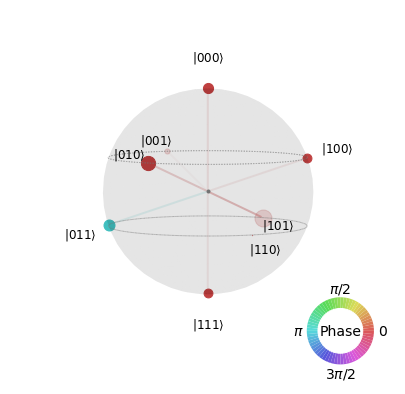

array([ 0.33791283+0.j,  0.17301168+0.j,  0.47394651+0.j, -0.36617869+0.j,
        0.2956633 +0.j,  0.56840202+0.j,  0.00927142+0.j,  0.29425525+0.j])

In [42]:
coeffs = rng.random((8, ))
coeffs[3] = -coeffs[3]
norm = np.linalg.norm(coeffs)
coeffs = coeffs / norm
initial_state = Statevector(coeffs)

display(plot_state_qsphere(initial_state))
initial_state.data

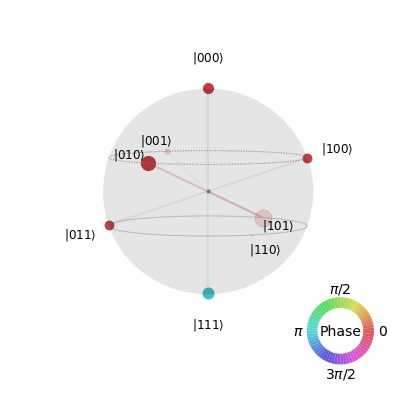

array([ 0.33791283+0.j,  0.17301168+0.j,  0.47394651+0.j,  0.29425525+0.j,
        0.2956633 +0.j,  0.56840202+0.j,  0.00927142+0.j, -0.36617869+0.j])

In [43]:
circ = QuantumCircuit(3)
circ.ccx(0, 1, 2)

final_state = initial_state.evolve(circ)
display(plot_state_qsphere(final_state))
final_state.data

## Fredkin gate

Input: An arbitrary three qubit state $\alpha|000\rangle + \gamma|001\rangle + \beta|010\rangle + \delta|011\rangle + \epsilon|100\rangle + \zeta|101\rangle + \eta|110\rangle + \theta|111\rangle)$.

Goal: The three qubit state $\alpha|000\rangle + \gamma|001\rangle + \beta|010\rangle + \delta|011\rangle + \epsilon|100\rangle + \eta|101\rangle + \zeta|110\rangle + \theta|111\rangle)$

Solution: The Fredkin gate flips the second and third qubits if the first cubit is in state $|1\rangle$, i.e. it is a controlled SWAP-gate.

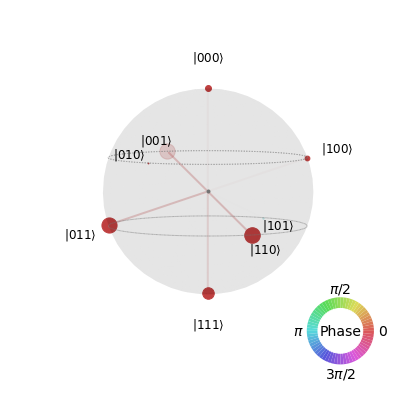

array([ 0.19758062+0.j,  0.51191822+0.j,  0.02660062+0.j,  0.50454086+0.j,
        0.158683  +0.j, -0.0536631 +0.j,  0.51788896+0.j,  0.38387963+0.j])

In [46]:
coeffs = rng.random((8, ))
coeffs[5] = -coeffs[5]
norm = np.linalg.norm(coeffs)
coeffs = coeffs / norm
initial_state = Statevector(coeffs)

display(plot_state_qsphere(initial_state))
initial_state.data

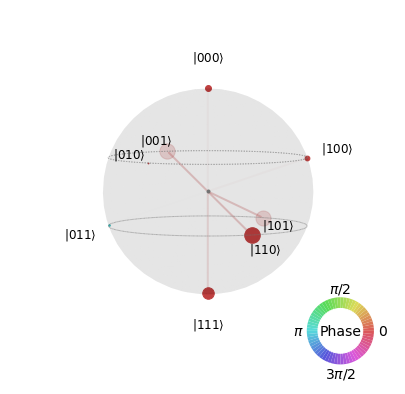

array([ 0.19758062+0.j,  0.51191822+0.j,  0.02660062+0.j, -0.0536631 +0.j,
        0.158683  +0.j,  0.50454086+0.j,  0.51788896+0.j,  0.38387963+0.j])

In [47]:
circ = QuantumCircuit(3)
circ.fredkin(0, 1, 2)

final_state = initial_state.evolve(circ)
display(plot_state_qsphere(final_state))
final_state.data